In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

delka vstupniho souboru je 51098 hz
vzorkovaci frekvence je 16000 hz
minimum je -0.0758056640625
maximum je 0.105255126953125
[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 3.1934375e+00 3.1935000e+00
 3.1935625e+00]


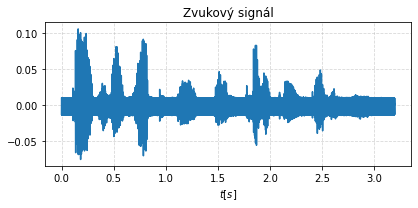

In [26]:
s, fs = sf.read('xkanko00.wav')
size = s.size
print("delka vstupniho souboru je", size, "hz")
print("vzorkovaci frekvence je", fs, "hz")
x = s
s = s[:size]
print("minimum je", s.min())
print("maximum je", s.max())
t = np.arange(size) / fs
print(t)
plt.figure(figsize=(6, 3))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

stredni hodnota je -1.3150545084629046e-05


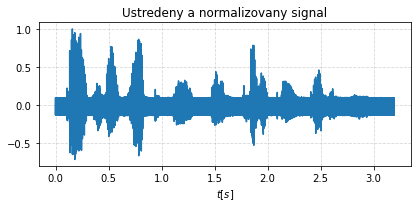

In [28]:
an = np.mean(s)
print("stredni hodnota je", an)
s = s + an
coef = 1 / s.max()
s = s * coef
t = np.arange(s.size) / fs
plt.figure(figsize=(6, 3))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Ustredeny a normalizovany signal')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

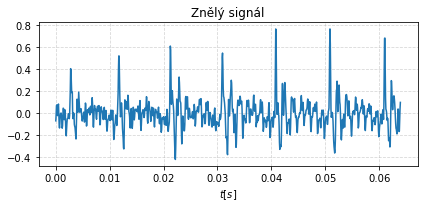

In [34]:
x = [s[i: i + 1024] for i in range(0, len(s), 512)]
t = np.arange(len(x[0])) / fs
plt.figure(figsize=(6, 3))
plt.plot(t, x[15])
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Znělý signál')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

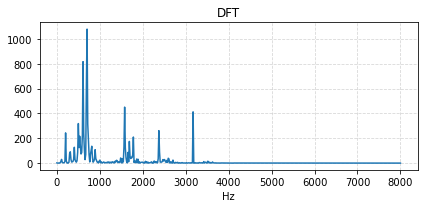

In [35]:
z = x[15]
N = z.shape[0]
n = np.arange(N)
k = n.reshape((N, 1))
M = np.exp(-2j * np.pi * k * n / N)
dftx = np.dot(M, z)
plt.figure(figsize=(6, 3))
r = np.abs(dftx)[:1024//2+1]**2
f_axis = np.arange(513)
plt.plot(f_axis/1024*fs, r)
plt.gca().set_xlabel('Hz')
plt.gca().set_title('DFT')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

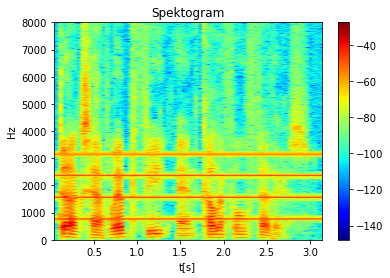

In [80]:
f, t, sgr = spectrogram(s, fs, nperseg=1024, noverlap=512)
sgr_log = 10 * np.log10(sgr)
plt.pcolormesh(t, f, sgr_log)
plt.title("Spektogram")
plt.colorbar()
plt.ylabel("Hz")
plt.xlabel("t[s]")
plt.show()